In [1]:
# Importo librerías

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
# Importo mi dataset.

songs = pd.read_csv("SpotifyAudioFeaturesApril2019.csv")

In [3]:
print(songs.shape)
songs.head()

(130663, 17)


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [4]:
# Son muchísimos registros. En pos de la optimización del tiempo a la hora de aplicar
# modelos, me voy a quedar con 15000. Por si acaso el orden de las filas condiciona de
# alguna forma los valores de las variables, voy a hacer un shuffle para así obtener 
# resgistros de forma aleatoria. 

from sklearn.utils import shuffle

songs = shuffle(songs).head(15000)

In [5]:
songs.shape

(15000, 17)

In [6]:
songs.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
29424,Londrelle,4m5kGUGKngl7Kp99Y5GapA,Sunflower Soul,0.04220,0.806,182000,0.484,0.000000,4,0.316,-9.607,0,0.3740,138.024,4,0.2340,29
68762,P Stack,1dEzz7zXQRo3X0VESBzlUM,Fiya,0.11900,0.777,161280,0.614,0.000000,2,0.129,-5.374,0,0.3640,128.056,4,0.3210,8
4290,3LAU,3as4sLqPThvJbuzoSJfQDz,Worlds Away,0.00174,0.513,232441,0.866,0.000007,1,0.166,-4.638,0,0.0289,126.997,4,0.0843,42
15955,Arijit Singh,4ISkpYcYDh58QRoVapxUTa,Maya,0.81500,0.539,234615,0.644,0.000000,7,0.133,-7.960,1,0.2090,156.051,4,0.4190,3
106479,Grateful Dead,34MFx4e30wwelAmN9GrUCS,Goin' Down The Road Feeling Bad - Live at Port...,0.50500,0.641,421053,0.571,0.592000,4,0.897,-11.204,1,0.0327,95.719,4,0.8110,47


In [7]:
songs.dtypes

artist_name          object
track_id             object
track_name           object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
popularity            int64
dtype: object

In [8]:
# Todas mis variables están en formato numérico salvo las 3 primeras.

len(songs["artist_name"].unique())

8922

In [9]:
# Las variables categóricas (artist_name, track_id y track_name) no me resultan relevantes. 

songs.drop(["artist_name", "track_id", "track_name"], axis = 1, inplace = True)
songs.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
29424,0.04220,0.806,182000,0.484,0.000000,4,0.316,-9.607,0,0.3740,138.024,4,0.2340,29
68762,0.11900,0.777,161280,0.614,0.000000,2,0.129,-5.374,0,0.3640,128.056,4,0.3210,8
4290,0.00174,0.513,232441,0.866,0.000007,1,0.166,-4.638,0,0.0289,126.997,4,0.0843,42
15955,0.81500,0.539,234615,0.644,0.000000,7,0.133,-7.960,1,0.2090,156.051,4,0.4190,3
106479,0.50500,0.641,421053,0.571,0.592000,4,0.897,-11.204,1,0.0327,95.719,4,0.8110,47


In [10]:
# Echo un ojo a los valores de mis variables

songs.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.344817,0.583184,2.110122e+05,0.570857,0.221503,5.294133,0.194788,-9.946762,0.61300,0.111131,119.393804,3.879333,0.440968,24.228467
std,0.344700,0.190057,1.165805e+05,0.259615,0.358956,3.603010,0.167588,6.535036,0.48708,0.121235,30.004260,0.528764,0.259195,19.734287
min,0.000000,0.000000,4.556000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033500,0.460000,1.635748e+05,0.398000,0.000000,2.000000,0.096900,-11.897000,0.00000,0.039000,96.310500,4.000000,0.224000,7.000000
50%,0.209000,0.609000,2.017160e+05,0.605000,0.000146,5.000000,0.123000,-7.938500,1.00000,0.055500,120.018500,4.000000,0.422000,22.000000
75%,0.641250,0.728000,2.400130e+05,0.776000,0.420250,9.000000,0.237000,-5.642000,1.00000,0.131000,139.203500,4.000000,0.638000,38.000000
max,0.996000,0.985000,3.532867e+06,1.000000,1.000000,11.000000,0.994000,0.935000,1.00000,0.954000,239.183000,5.000000,0.993000,96.000000


In [11]:
# Voy a reducir los valores de popularidad a 2: no popular (0), popular (1).
# Para ello, voy a cortar por la media.

def reduce_popularity(p):
    if p >= 24:
        return 1
    else:
        return 0
    
songs["popularity"] = songs["popularity"].apply(reduce_popularity)

songs.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
29424,0.04220,0.806,182000,0.484,0.000000,4,0.316,-9.607,0,0.3740,138.024,4,0.2340,1
68762,0.11900,0.777,161280,0.614,0.000000,2,0.129,-5.374,0,0.3640,128.056,4,0.3210,0
4290,0.00174,0.513,232441,0.866,0.000007,1,0.166,-4.638,0,0.0289,126.997,4,0.0843,1
15955,0.81500,0.539,234615,0.644,0.000000,7,0.133,-7.960,1,0.2090,156.051,4,0.4190,0
106479,0.50500,0.641,421053,0.571,0.592000,4,0.897,-11.204,1,0.0327,95.719,4,0.8110,1


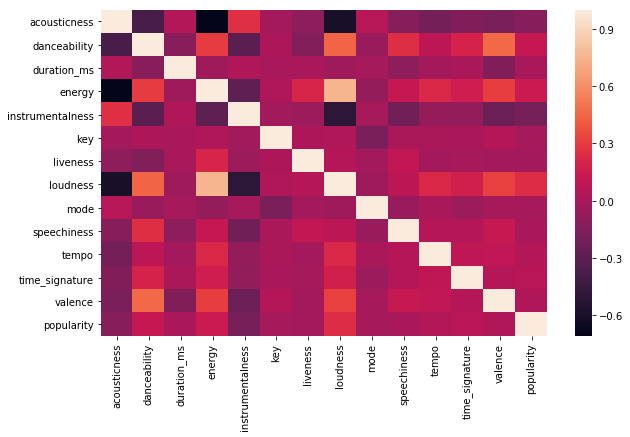

In [12]:
# Hago la matriz de correlación

numeric_data = songs._get_numeric_data()
correl = numeric_data.corr()

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(correl)

# No hay ninguna columna excesivamente correlacionada con otra. 

### Model

In [16]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [13]:
# Voy a utilizar popularity como groundtruth, utilizando el resto de valores como
# features para tratar de predecir el valor de popularity.

from sklearn.model_selection import train_test_split

X = songs.drop("popularity", axis = 1)
y = songs["popularity"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12000, 13) (3000, 13) (12000,) (3000,)


In [17]:
clf_svc = svm.SVC(gamma ="auto").fit(X_train, y_train)
clf_LR = LogisticRegression(solver = "liblinear", C = 5, multi_class = "auto").fit(X_train, y_train)
clf_RF = RandomForestClassifier(n_estimators = 10).fit(X_train, y_train)

In [18]:
models = [clf_svc, clf_LR, clf_RF]
modelsS = ["clf_svc", "clf_LR", "clf_RF"]

### Score

In [19]:
scores = {}

for i in range(len(models)):
    scores[modelsS[i]] = models[i].score(X, y)

    
scoresdf = pd.DataFrame(scores, index = range(1))

display(scoresdf)

,clf_svc,clf_LR,clf_RF
0,0.907467,0.599733,0.9072


### Confusion Matrix

In [20]:
conf_matrixes = {}

for i in range(len(models)):
    predictions = models[i].predict(X_test)
    conf_matrixes[modelsS[i]] = confusion_matrix(y_test, predictions)

conf_matrixes

{'clf_svc': array([[1609,   17],
        [1356,   18]]), 'clf_LR': array([[1010,  616],
        [ 627,  747]]), 'clf_RF': array([[1128,  498],
        [ 688,  686]])}

In [ ]:
for mod in models:
    predictions = mod.predict(X_test)
    c_matrix = confusion_matrix(y_test, predictions)
    df_cm = pd.DataFrame(c_matrix, index = range(len(c_matrix)),
                  columns = range(len(c_matrix)))
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot = True)

In [21]:
predictions = clf_svc.predict(X_test)
c_matrix = confusion_matrix(y_test, predictions)

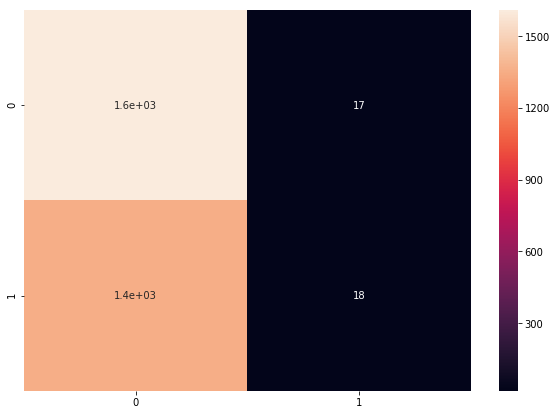

In [22]:
df_cm = pd.DataFrame(c_matrix, index = range(len(c_matrix)),
                  columns = range(len(c_matrix)))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot = True)

### Roc Curve

### clf_svc

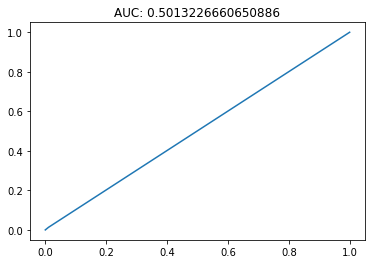

In [23]:
predictions = clf_svc.predict(X_test)
roc_curve(y_test, predictions)
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)
auc = metrics.roc_auc_score(y_test, predictions)
plt.title("AUC: {}".format(auc))
plt.plot(fpr,tpr)

### clf_LR

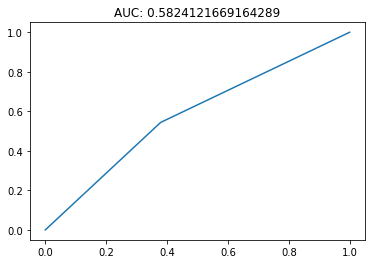

In [24]:
predictions = clf_LR.predict(X_test)
roc_curve(y_test, predictions)
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)
auc = metrics.roc_auc_score(y_test, predictions)
plt.title("AUC: {}".format(auc))
plt.plot(fpr,tpr)

### clf_RF

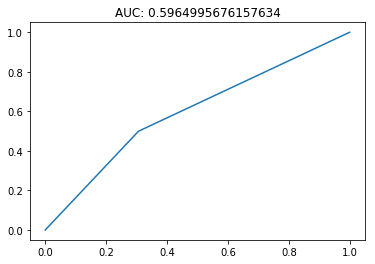

In [25]:
predictions = clf_RF.predict(X_test)
roc_curve(y_test, predictions)
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)
auc = metrics.roc_auc_score(y_test, predictions)
plt.title("AUC: {}".format(auc))
plt.plot(fpr,tpr)